In [1]:
import pandas, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20})

# 0. user-defined variables

In [2]:
data_file ='/home/adrian/projects/HUVECs/data/csv/HUVEC_AllMeasurements_Summary_21.12.2020.15NOSK_EC47.csv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file)
df.astype('float', errors='ignore')
df.head()

,Sample ID,Sample ID Rosa,Experiment,13label,Treatment,Timepoint (h),Cell numbers,Glutamine,UDP Glucose,UDP-nAcGLn,Glutamate,Aspartate,Proline,Glutathion Ox+H,Glutathion RED
0,EC047Cells-EGM-6-1,EC047Cells-EGM-6-1,EC47,egm,0.0,4,NaN,0.0000,0.0899,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,EC047Cells-EGM-6-2,EC047Cells-EGM-6-2,EC47,egm,0.0,4,NaN,0.0000,0.0632,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,EC047Cells-EGM-6-3,EC047Cells-EGM-6-3,EC47,egm,0.0,4,NaN,0.0000,0.0158,0.0000,0.0018,0.0000,0.0000,0.0000,0.0000
3,EC047Cells-F-15N-6-1,EC047Cells-F-15N-6-1,EC47,15N2 glutamine,0.0,4,NaN,0.5865,0.0395,0.1077,0.2034,0.1864,0.1604,0.0363,0.0372
4,EC047Cells-F-15N-6-2,EC047Cells-F-15N-6-2,EC47,15N2 glutamine,0.0,4,NaN,0.5814,0.1262,0.1464,0.1812,0.1809,0.1918,0.0364,0.0368


# 2. format data

## 2.1. select appropriate rows

In [4]:
# remove egm of T4 and T24 because they are very close to zero
df = df[~((df['13label'] == 'egm') & (df['Timepoint (h)'] == 4))] 
df = df[~((df['13label'] == 'egm') & (df['Timepoint (h)'] == 24))] 

In [5]:
pandas.set_option("display.max_rows", 200, "display.max_columns", 20)
print(df)

                  Sample ID           Sample ID Rosa Experiment  \
3      EC047Cells-F-15N-6-1     EC047Cells-F-15N-6-1       EC47   
4      EC047Cells-F-15N-6-2     EC047Cells-F-15N-6-2       EC47   
5      EC047Cells-F-15N-6-3     EC047Cells-F-15N-6-3       EC47   
6    EC047Cells-G-0.5uM-6-1   EC047Cells-G-0.5uM-6-1       EC47   
7    EC047Cells-G-0.5uM-6-2   EC047Cells-G-0.5uM-6-2       EC47   
8    EC047Cells-G-0.5uM-6-3   EC047Cells-G-0.5uM-6-3       EC47   
9      EC047Cells-H-5uM-6-1     EC047Cells-H-5uM-6-1       EC47   
10     EC047Cells-H-5uM-6-2     EC047Cells-H-5uM-6-2       EC47   
11     EC047Cells-H-5uM-6-3     EC047Cells-H-5uM-6-3       EC47   
15    EC047Cells-F-15N-24-1    EC047Cells-F-15N-24-1       EC47   
16    EC047Cells-F-15N-24-2    EC047Cells-F-15N-24-2       EC47   
17    EC047Cells-F-15N-24-3    EC047Cells-F-15N-24-3       EC47   
18  EC047Cells-G-0.5uM-24-1  EC047Cells-G-0.5uM-24-1       EC47   
19  EC047Cells-G-0.5uM-24-2  EC047Cells-G-0.5uM-24-2       EC4

# 3. plot

Glutamine
2 significant 0.5836 0.6018 0.04042779918502612
5 significant 0.5875333333333334 0.6061333333333333 0.04042779918502612
6 significant 0.5875333333333334 0.5830333333333333 0.04042779918502612


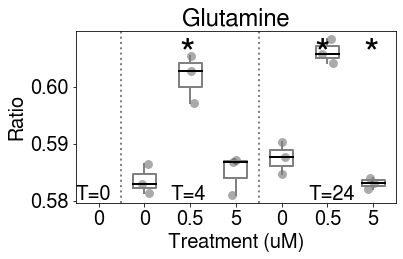

UDP Glucose


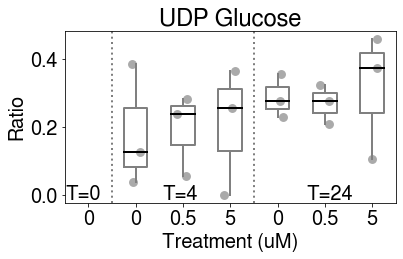

UDP-nAcGLn


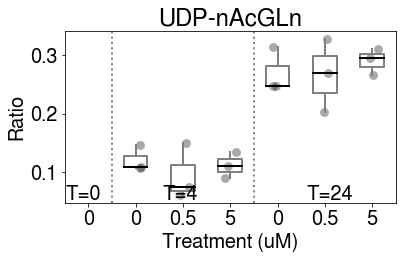

Glutamate


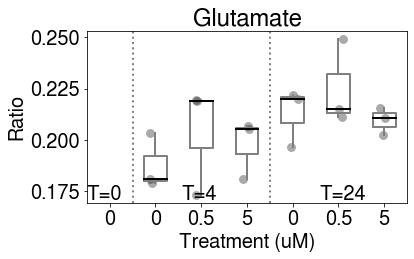

Aspartate


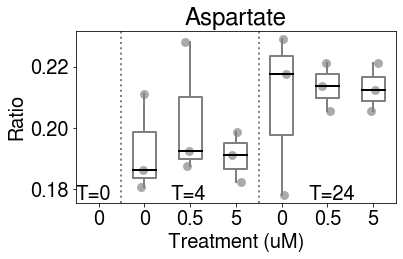

Proline
5 significant 0.19456666666666667 0.24050000000000002 0.04042779918502612


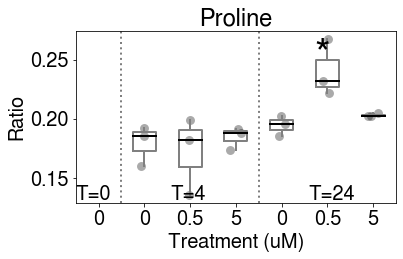

Glutathion Ox+H
2 significant 0.036833333333333336 0.04096666666666667 0.04042779918502612
5 significant 0.07423333333333333 0.07783333333333332 0.04042779918502612


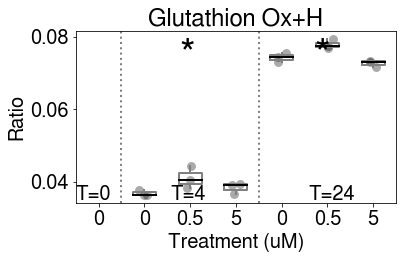

Glutathion RED


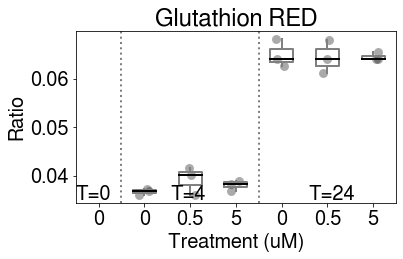

In [6]:
for metab in df.columns[7:]:
    
    print(metab)
    
    loc_zero_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 0)][metab].values
    
    loc_four_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 4)][metab].values
    loc_four_half = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 4)][metab].values
    loc_four_five = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 4)][metab].values

    loc_twentyfour_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 24)][metab].values
    loc_twentyfour_half = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 24)][metab].values
    loc_twentyfour_five = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 24)][metab].values
    
    quant = [loc_zero_zero, loc_four_zero, loc_four_half, loc_four_five, loc_twentyfour_zero, loc_twentyfour_half, loc_twentyfour_five]
        
    ###
    ### boxplots
    ###
    
    f = matplotlib.pyplot.figure()
    ax = f.add_subplot(111)
    
    filtered = [element[~numpy.isnan(element)] for element in quant]
        
    matplotlib.pyplot.boxplot(filtered, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))
    
    ###
    ### scatter plots
    ###
    
    x=[]; y=[]
    for i in range(len(quant)):
        for j in range(len(quant[i])):
            
            shift = 0.25
            r=-shift/2 + shift*numpy.random.random()
            x.append(i+1+r)
            
            y.append(quant[i][j])
            
    matplotlib.pyplot.scatter(x, y, s=80, c='black', alpha=1/3, linewidths=0)
    
    ###
    ### statistics
    ###
    
    for pos in [2, 3]:
        if list(filtered[1]) != list(filtered[pos]):
            stat, pvalue = scipy.stats.mannwhitneyu(filtered[1], filtered[pos])
            if 0.01 < pvalue < 0.05:
                print(pos, 'significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
                matplotlib.pyplot.text(pos/5.75, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            if pvalue < 0.01:
                print(pos, 'very significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
                matplotlib.pyplot.text(pos/5.5, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    for pos in [5, 6]:
        if list(filtered[4]) != list(filtered[pos]):
            stat, pvalue = scipy.stats.mannwhitneyu(filtered[4], filtered[pos])
            if 0.01 < pvalue < 0.05:
                print(pos, 'significant', numpy.mean(filtered[4]), numpy.mean(filtered[pos]), pvalue)
                matplotlib.pyplot.text(pos/6.5, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            if pvalue < 0.01:
                print(pos, 'very significant', numpy.mean(filtered[5]), numpy.mean(filtered[pos]), pvalue)
                matplotlib.pyplot.text(pos/6, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    ###
    ### close figure
    ###
    
    matplotlib.pyplot.axvline(1.5, alpha=0.5, lw=2, color='black', ls=':')
    matplotlib.pyplot.axvline(4.5, alpha=0.5, lw=2, color='black', ls=':')
    
    matplotlib.pyplot.text(0.055, 0.05, 'T=0', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.35, 0.05, 'T=4', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.8, 0.05, 'T=24', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    
    matplotlib.pyplot.xlabel('Treatment (uM)')
    matplotlib.pyplot.ylabel('Ratio')
    matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7], ['0', '0', '0.5', '5', '0', '0.5', '5'])
    matplotlib.pyplot.title(metab)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()